In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from matplotlib import pyplot
import numpy as np

Using TensorFlow backend.


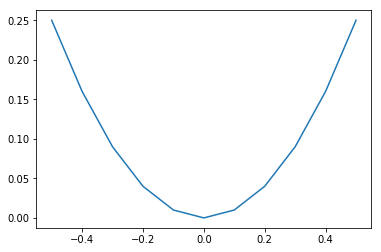

In [0]:
def calculate(x):
    return np.square(x)

inputs  = np.linspace(-.5, .5, 11)
outputs = [ calculate(x) for x in inputs ]

pyplot.plot(inputs, outputs)
pyplot.show()

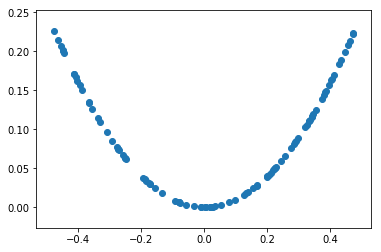

In [0]:
# Generating random samples.
def generate_samples(n=100):
    X1 = np.random.rand(n) -0.5
    X2 = X1 * X1
    
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    
    return np.hstack((X1, X2))
    
data = generate_samples()

pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()

In [0]:
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    
model = define_discriminator()
model.summary()

#plot_model(model, to_file="discriminator_plot.png", show_shapes=True, show_layer_names=True)

W0722 18:36:37.279695 139652341553024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 18:36:37.339823 139652341553024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 18:36:37.357489 139652341553024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 18:36:37.393759 139652341553024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0722 18:36:37.418316 139652341553024 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [0]:
def generate_real_samples(n):
    X1 = np.random.rand(n) - 0.5
    X2 = X1 * X1
  
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
  
    X = np.hstack((X1, X2))
    y = np.ones((n, 1))
  
    return X, y

def generate_fake_samples(n):
    X1 = -1 + np.random.rand(n) * 2
    X2 = -1 + np.random.rand(n) * 2
  
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
  
    X = np.hstack((X1, X2))
    y = np.zeros((n, 1))
    
    return X, y

In [0]:
def train_discriminator(model, n_epochs=1000, n_batch=128):
    half_batch = int(n_batch / 2)
    
    for i in range(n_epochs):
      
        X_real, y_real = generate_real_samples(half_batch)
        model.train_on_batch(X_real, y_real)
        
        X_fake, y_fake = generate_fake_samples(half_batch)
        model.train_on_batch(X_fake, y_fake)
        
        _, acc_real = model.evaluate(X_real, y_real, verbose=0)
        _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
        
        if i % 50 == 0:
            print(i, acc_real, acc_fake)

In [0]:
train_discriminator(model)

W0722 18:36:37.839298 139652341553024 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



0 0.4375 0.53125
50 0.5625 0.640625
100 0.59375 0.734375
150 0.40625 0.9375
200 0.640625 0.9375
250 0.796875 1.0
300 0.8125 0.953125
350 0.90625 0.953125
400 0.953125 0.9375
450 0.953125 0.859375
500 1.0 0.90625
550 1.0 0.84375
600 1.0 0.90625
650 1.0 0.859375
700 1.0 0.859375
750 1.0 0.890625
800 1.0 0.796875
850 1.0 0.890625
900 1.0 0.921875
950 1.0 0.765625


In [0]:
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model
  
model = define_generator(5)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 32        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [0]:
def generate_latent_points(latent_dim, n):
    x_input = np.random.randn(latent_dim * n)
    x_input = x_input.reshape(n, latent_dim)
    return x_input

def generate_fake_samples(generator, latent_dim, n):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    
    pyplot.scatter(X[:, 0], X[:, 1])
    pyplot.show()
    
    #y = np.zeros((n, 1))
    #return X, y

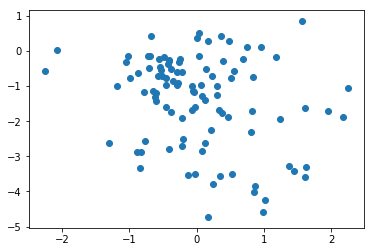

In [0]:
latent_dim = 5
model = define_generator(latent_dim)

generate_fake_samples(model, latent_dim, 100)

In [0]:
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

In [0]:
latent_dim    = 5
discriminator = define_discriminator()
generator     = define_generator(latent_dim)
gan_model     = define_gan(generator, discriminator)
gan_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_11 (Sequential)   (None, 2)                 122       
_________________________________________________________________
sequential_10 (Sequential)   (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


In [0]:
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
    for i in range(n_epochs):
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)

In [0]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        
        x_gan = genearate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        
        gan_model.train_on_batch(x_gan, y_gan)

In [0]:
def generate_fake_samples(generator, latent_dim, n):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    
    #pyplot.scatter(X[:, 0], X[:, 1])
    #pyplot.show()
    y = np.zeros((n,1))
    return X, y
    
def summarize_performance(generator, latent_dim, n=100):
  x_real, y_real = generate_real_samples(n)
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
  
  pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
  pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
  pyplot.show()

In [0]:
def summarize_performance(epoch, generate, discriminator, latent_dim, n=100):
    x_real, y_real = generate_real_samples(n)
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    
    print(epoch, acc_real, acc_fake)
    
    pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
    pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
    pyplot.show()

In [0]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        
        gan_model.train_on_batch(x_gan, y_gan)
        
        if (i+1) % n_eval == 0:
            summarize_performance(i, g_model, d_model, latent_dim)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1999 0.68 0.43


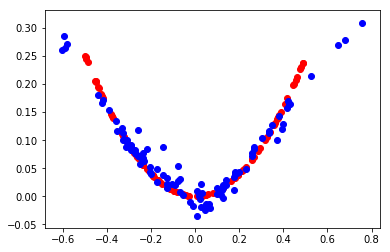

3999 0.39 0.75


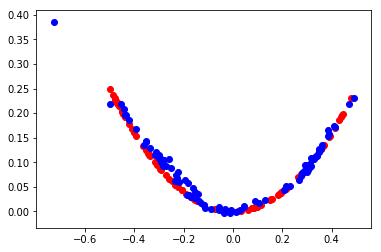

5999 0.78 0.33


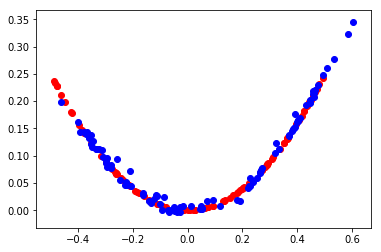

7999 0.7 0.4


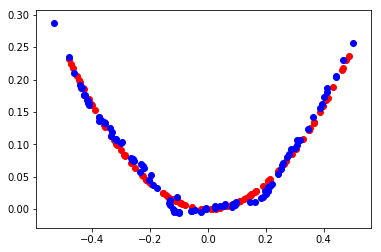

9999 0.48 0.55


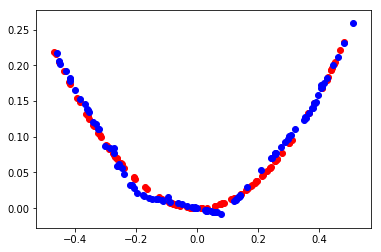

In [0]:
latent_dim    = 5
discriminator = define_discriminator()
generator     = define_generator(latent_dim)
gan_model     = define_gan(generator, discriminator)

train(generator, discriminator, gan_model, latent_dim)